In [10]:
import warnings 
warnings.filterwarnings('ignore')   #will ignore the warnings

**IMPORTING THE DEPENDENCIES**

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import matplotlib.pyplot as plt   #data visualization
import seaborn as sns   #data visualization and exploratory data analysis
from operator import add

#plot graphics will appear in your notebook
%matplotlib inline  

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

**DATA COLLECTION AND PROCESSING**

In [12]:
#load the data
data = pd.read_csv('/content/framingham_heart_disease.csv')
# We drop the education column because it has no correlation with heart disease
data.drop(['education'],axis=1,inplace=True)   #Removes the 'education' column||if inplace true means removing done on current data frame else in a copy
data.head(5)   #to access the first 5 rows of a dataframe

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [13]:
# no. of rows and columns
data.shape

(4238, 15)

**EXPLORATORY** **DATA** **ANALYSIS**

Data Cleaning

***Missing Data***

In [14]:
#total number of missing data per category
missing_data = data.isnull().sum()   #returns the number of missing values in the data set.
missing_data

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [15]:
# percentage of missing data per category
total = data.isnull().sum().sort_values(ascending=False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)*100
missing = pd.concat([total, percent_total], axis=1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.155262
BPMeds,53,1.250590
totChol,50,1.179802
cigsPerDay,29,0.684285
BMI,19,0.448325
heartRate,1,0.023596


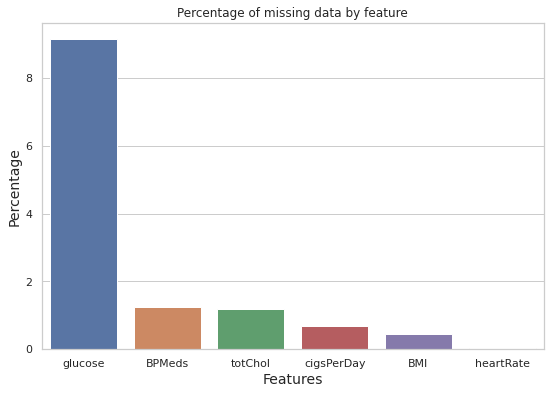

In [16]:
#missing data plot
plt.figure(figsize=(9,6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by feature')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [17]:
# drop the missing entries
data.dropna(axis=0, inplace=True)   #removes the rows that contains NULL values

In [18]:
data.shape

(3749, 15)

***Data Distribution***

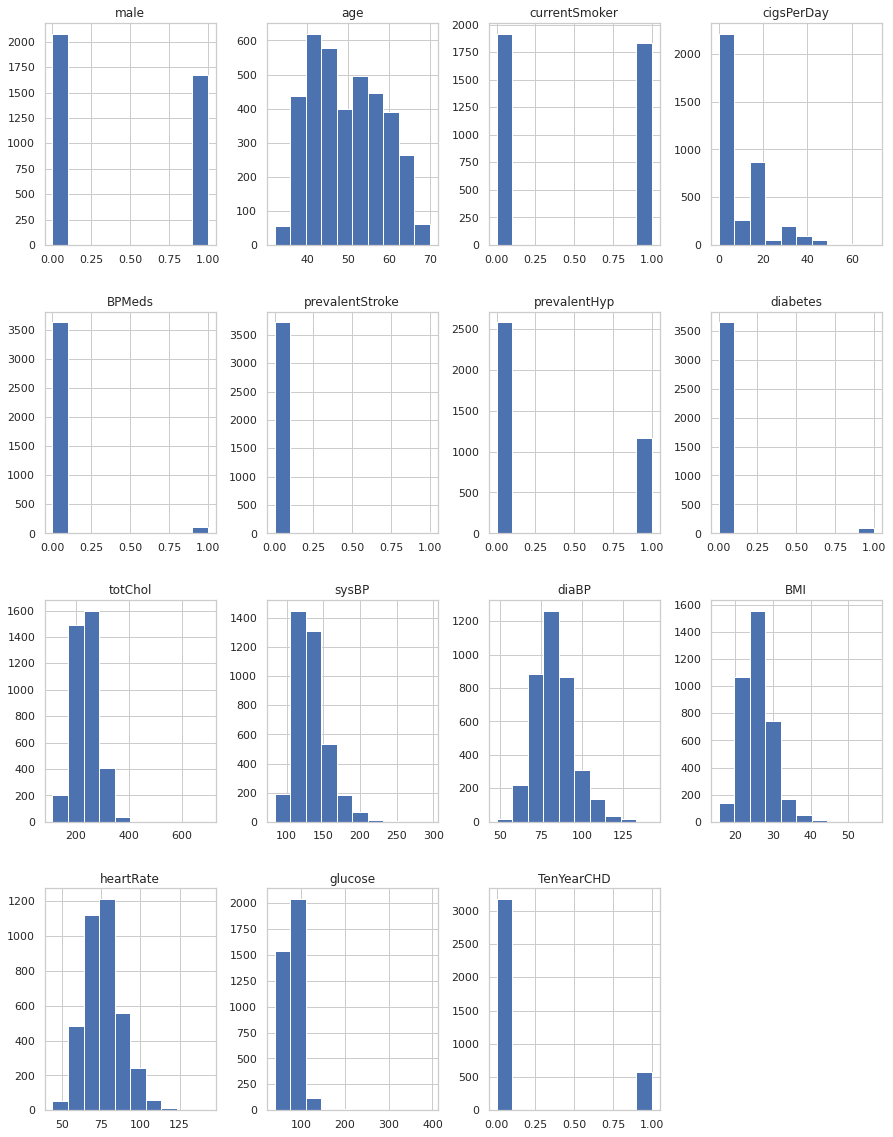

In [19]:
# plot histogram to see the distribution of the data
fig = plt.figure(figsize = (15,20))
ax = fig.gca()    #used to get the current axes
data.hist(ax = ax)
plt.show()

*Case Counts*

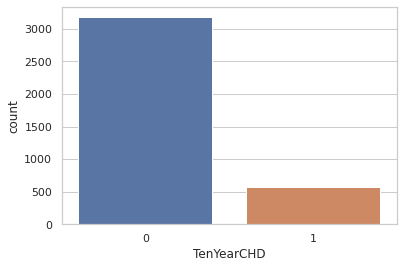

There are 3177 patients without heart disease and 572 patients with the disease


In [20]:
sns.countplot(x='TenYearCHD',data=data)
plt.show()
cases = data.TenYearCHD.value_counts()    # value_counts() function returns object containing counts of unique values
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")


***Categorical variable comparisons***

In [21]:
def stacked_barchart(data, title = None, ylabel = None, xlabel = None):
    default_colors = ['#008080', '#5f3c41', '#219AD8']
    # From raw value to percentage
    totals = data.sum(axis=1)
    bars = ((data.T / totals) * 100).T
    r = list(range(data.index.size))

    # Plot
    barWidth = 0.95
    names = data.index.tolist()
    bottom = [0] * bars.shape[0]

    # Create bars
    color_index = 0
    plots = []
    for bar in bars.columns:
        plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor='white', width=barWidth))
        bottom = list(map(add, bottom, bars[bar]))
        color_index = 0 if color_index >= len(default_colors) else color_index + 1

    # Custom x axis
    plt.title(title)
    plt.xticks(r, names)
    plt.xlabel(data.index.name if xlabel is None else xlabel)
    plt.ylabel(data.columns.name if ylabel is None else ylabel)
    ax = plt.gca()
        
    y_labels = ax.get_yticks()
    ax.set_yticklabels([str(y) + '%' for y in y_labels])

    flat_list = [item for sublist in data.T.values for item in sublist]
    for i, d in zip(ax.patches, flat_list):
        data_label = str(d) + " (" + str(round(i.get_height(), 2)) + "%)"
        ax.text(i.get_x() + 0.45, i.get_y() + 5, data_label, horizontalalignment='center', verticalalignment='center', fontdict = dict(color = 'white', size = 20))

    for item in ([ax.title]):
        item.set_fontsize(27)
        
    for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(24)
    
    legend = ax.legend(plots, bars.columns.tolist(), fancybox=True)
    plt.setp(legend.get_texts(), fontsize='20')

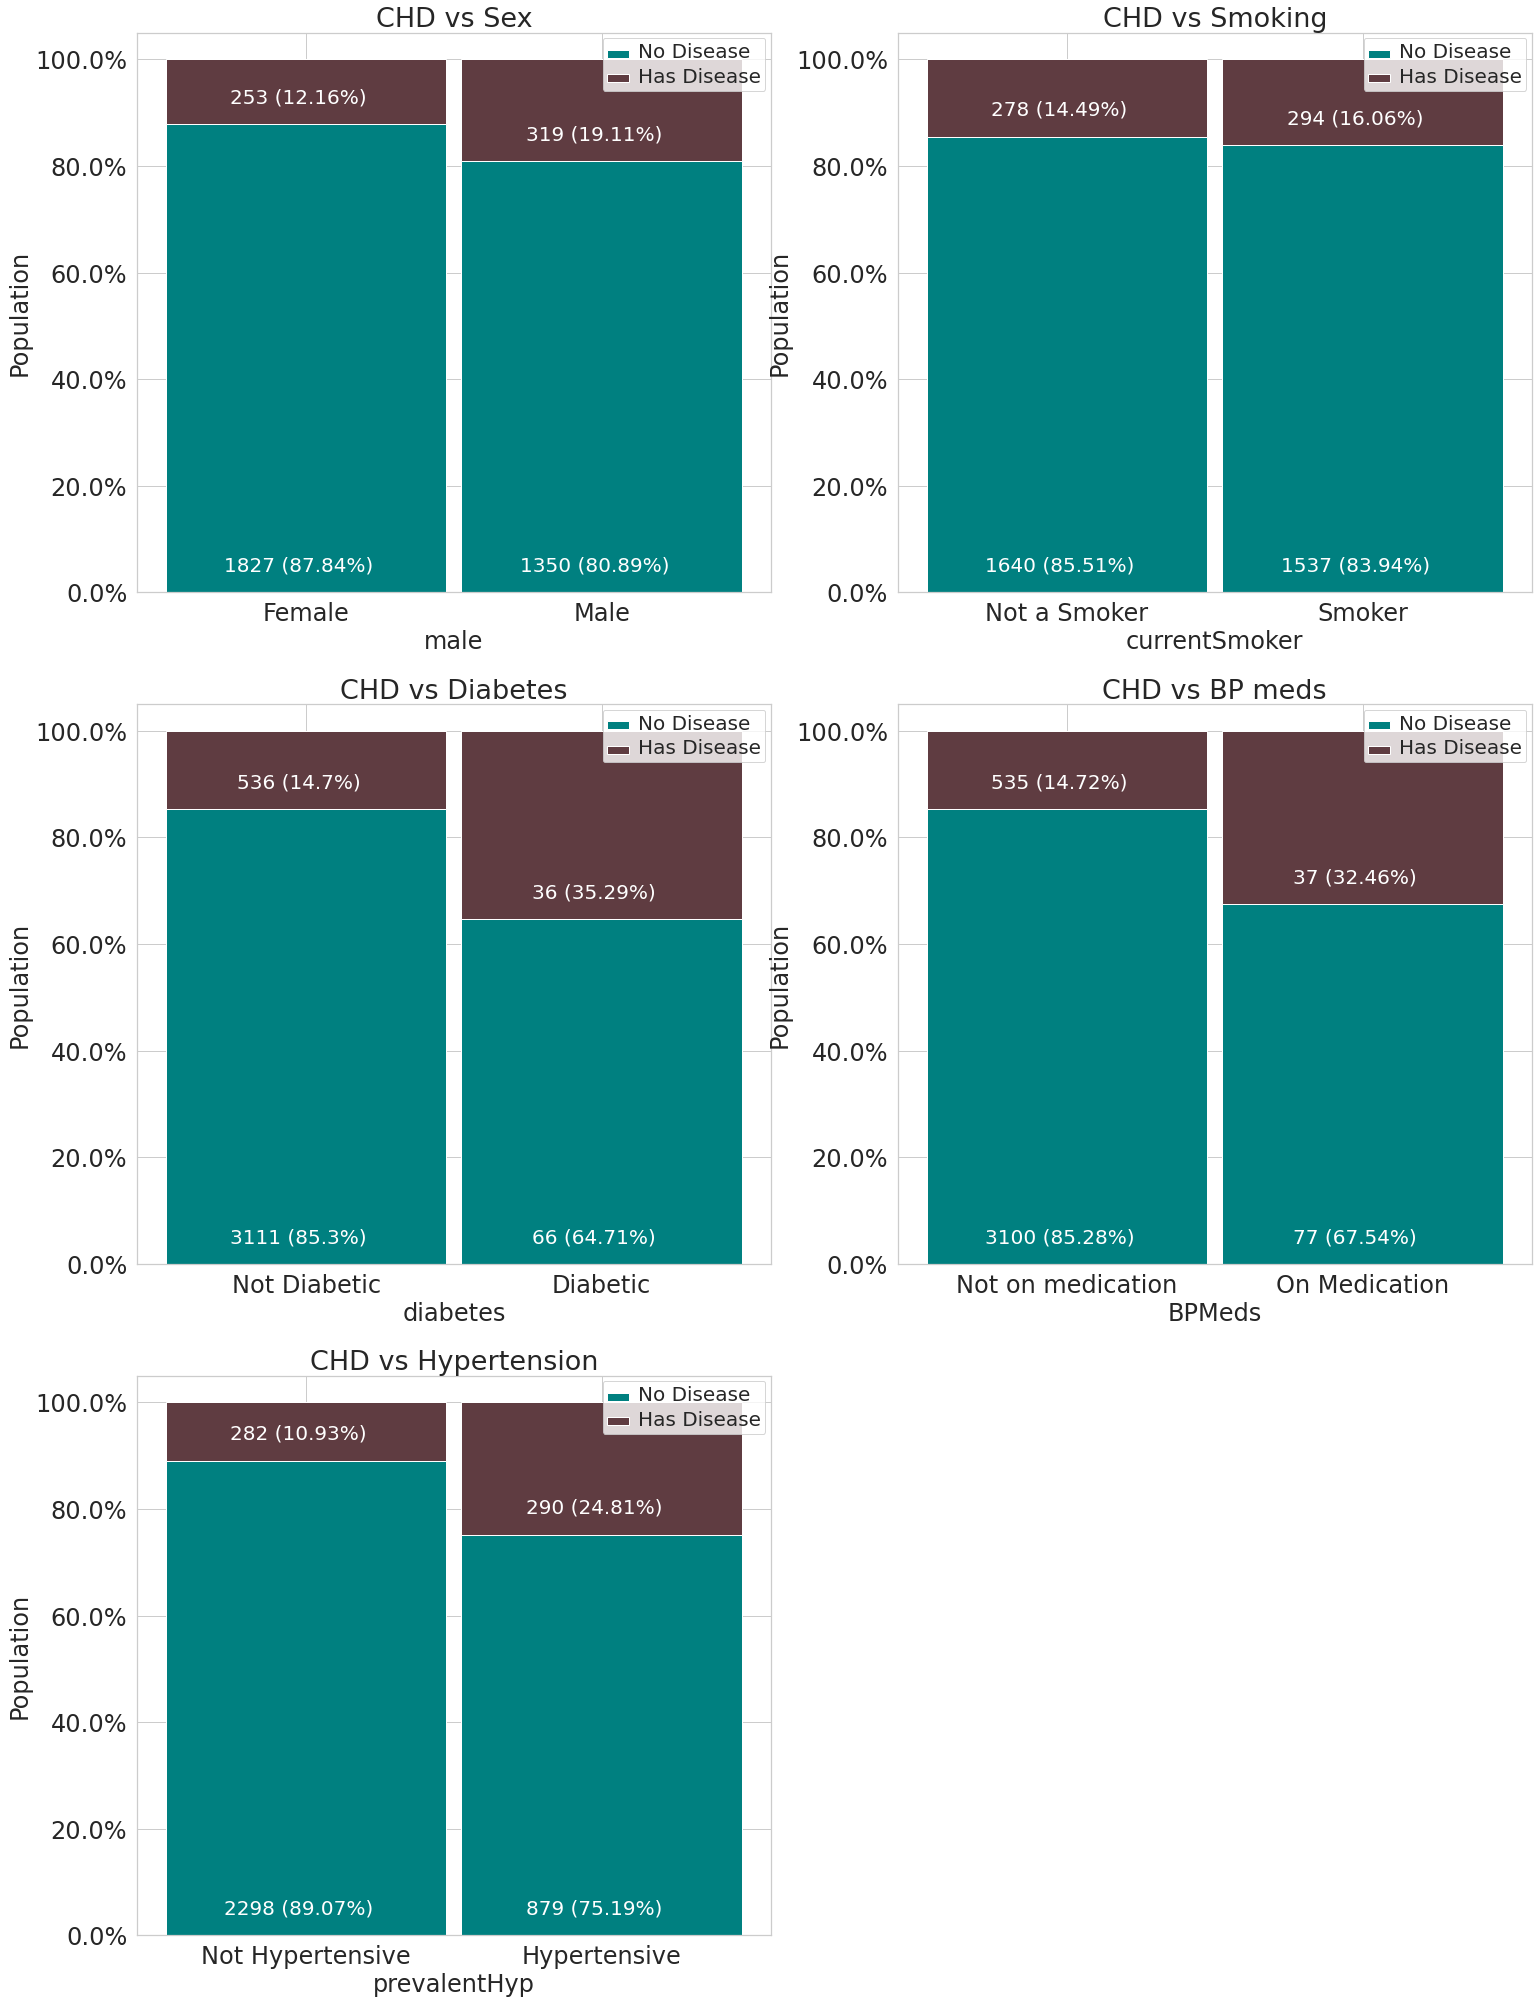

In [22]:
fig = plt.gcf()   #allows you to get a reference to the current figure when using pyplot.
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['male','TenYearCHD']].groupby(['male','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Female', 1:'Male'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylabel = 'Population')

#draw smoking satus vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['currentSmoker','TenYearCHD']].groupby(['currentSmoker','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not a Smoker', 1:'Smoker'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylabel = 'Population')

#draw diabetes vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['diabetes','TenYearCHD']].groupby(['diabetes','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Diabetic', 1:'Diabetic'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylabel = 'Population')

#draw BP meds vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['BPMeds','TenYearCHD']].groupby(['BPMeds','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not on medication', 1:'On Medication'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BP meds', ylabel = 'Population')

#draw Hypertension vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['prevalentHyp','TenYearCHD']].groupby(['prevalentHyp','TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index={0:'Not Hypertensive', 1:'Hypertensive'}, columns={0:'No Disease', 1:'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylabel = 'Population')

***Number of people who have disease vs age***

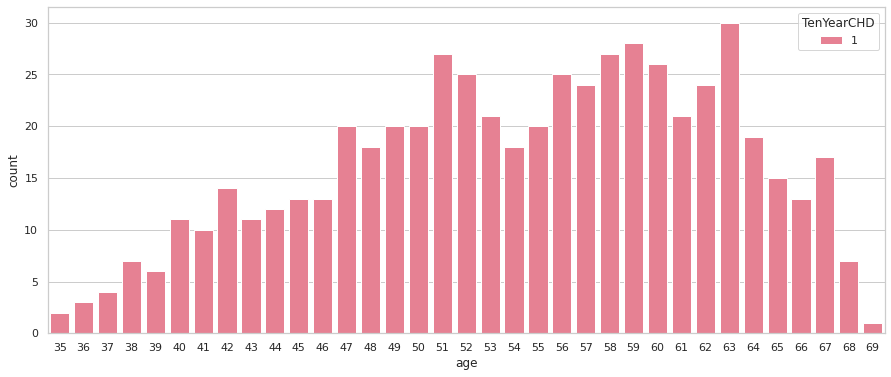

In [23]:
positive_cases = data[data['TenYearCHD'] == 1]
plt.figure(figsize=(15,6))
sns.countplot(x='age',data = positive_cases, hue = 'TenYearCHD', palette='husl')
plt.show()

***Correlation Heat map***

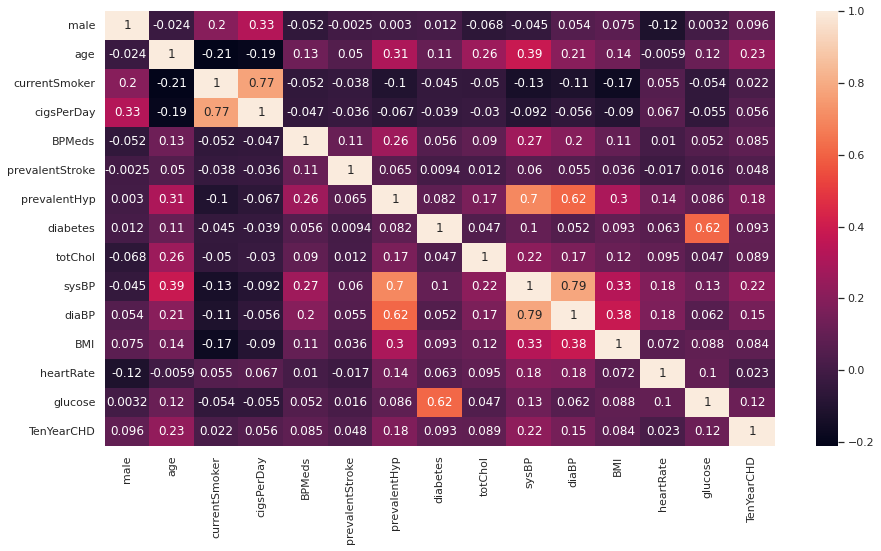

In [24]:
#A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)   # sns.heatmap is plot of rectangular data as a color-encoded matrix.
plt.show()
# Light colour means good corelations and vice versa

**FEATURE SELECTION**

In [25]:
!pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 3.2 MB/s eta 0:00:00


In [26]:
from sklearn.ensemble import RandomForestClassifier   #The sklearn.ensemble module includes two averaging algorithms based on randomized decision trees: the RandomForest algorithm and the Extra-Trees method.
from boruta import BorutaPy

In [27]:
#define the features
X = data.iloc[:,:-1].values  #data.iloc[:,:-1] means until the last column
y = data.iloc[:,-1].values   #data.iloc[:,-1] means the last column
#iloc” in pandas is used to select rows and columns by number, in the order that they appear in the data frame.

rfc = RandomForestClassifier(random_state = 1, n_estimators=1000, class_weight='balanced')   # general random forest classifier

# define Boruta feature selection method
feat_selector = BorutaPy(rfc, n_estimators='auto', verbose=2) 
 
# find all relevant features
feat_selector.fit(X, y)  

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	8
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=28,
                                          random_state=RandomState(MT19937) at 0x7FDE207ACB40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FDE207ACB40, verbose=2)

After running the Boruta algo through 100 iterations, initially 0 features were confirmed, but with further iterations we had some confirmed features, rejecting the rest or keeping them tentative. 
On the 100th (last) iteration we have 3 confirmed features, 10 rejected features and 0 tentative feature.

In [28]:
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()  #The tolist() function is used to convert a given array to an ordinary list with the same items, elements, or values.
most_important                                                       #x[start_index : end_index : step] ---> [:-1] means from start to one before the end. Default start is 0. Default step is 1. If Step is negative it starts at the end and goes backward.

['age', 'sysBP']

In [29]:
# select the top 7 important features
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [30]:
# Checking the distribution of the target variable
data['TenYearCHD'].value_counts()

0    3177
1     572
Name: TenYearCHD, dtype: int64

Target variable (Ten year CHD)

0 ---> No risk of heart disease

1 ---> Risk of heart disease

Pair Plot

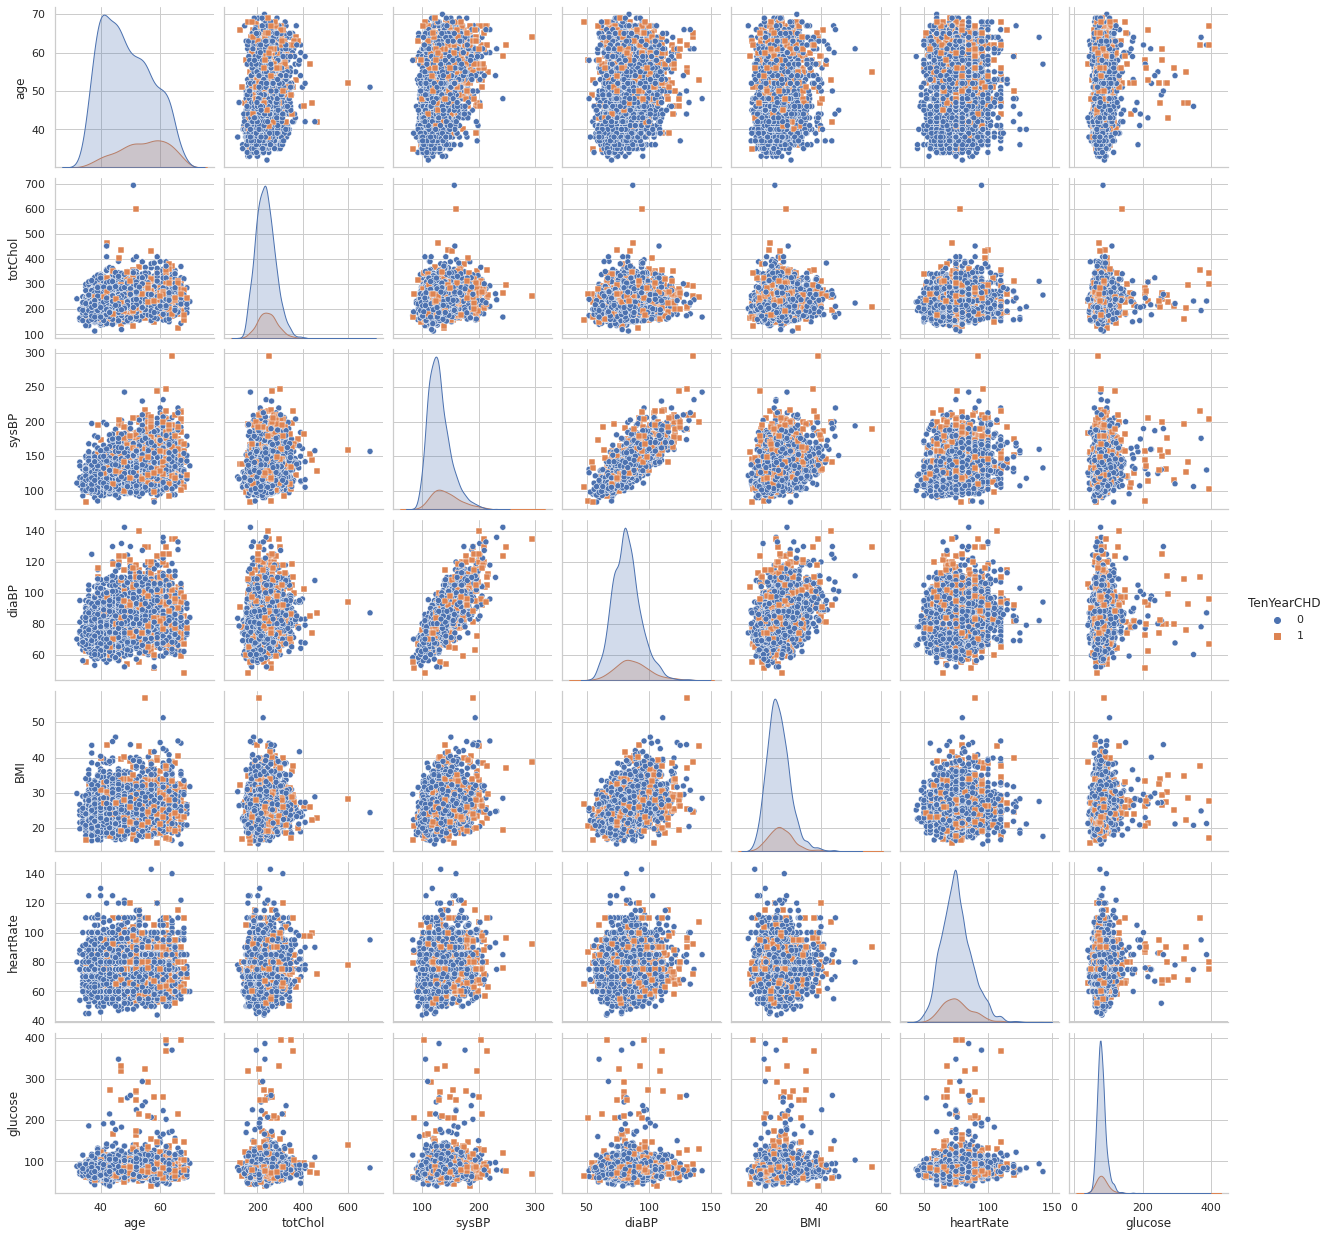

In [31]:
sns.pairplot(data, hue = 'TenYearCHD', markers=["o", "s"], vars = top_features)

Balancing the Dataset (SMOTE Analysis)

In [32]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

In [33]:
X = data[top_features]
y = data['TenYearCHD']

In [34]:
X.shape,y.shape

((3749, 7), (3749,))

In [35]:
# Implementing oversampling for handling imbalanced data
smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_resample(X,y)

In [36]:
X_res.shape,y_res.shape

((6300, 7), (6300,))

Our X and y were initially 3749 and after oversampling became 6306, because initially binary 0 (people not in the risk of CHD) was 3177 and 1 (people in the risk of CHD) was 572, so in order to balance the data 1 created it's data so it could match the value of 0.

In [37]:
# We are comparing the intial y data with the y data after oversampling
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 3177, 1: 572})
Resampled dataset shape Counter({0: 3150, 1: 3150})


It's 50-50. Therefore our data is balanced

In [38]:
num_before = Counter(y)
num_after = Counter(y_res)

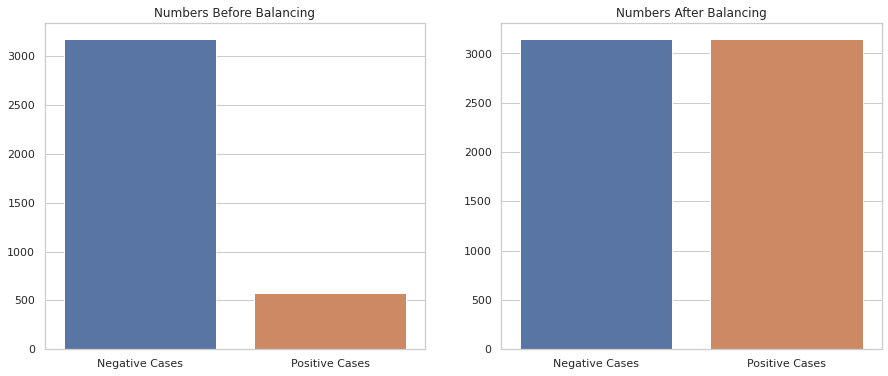

In [39]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

***Splitting data into Training and Testing sets***

In [40]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_res), pd.DataFrame(y_res)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,39,195.0,106.0,70.0,26.97,80.0,77.0,0
1,46,250.0,121.0,81.0,28.73,95.0,76.0,0
2,48,245.0,127.5,80.0,25.34,75.0,70.0,0
3,61,225.0,150.0,95.0,28.58,65.0,103.0,1
4,46,285.0,130.0,84.0,23.10,85.0,85.0,0


In [41]:
X_new = new_data[top_features]
y_new= new_data['TenYearCHD']
X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,39,195.0,106.0,70.0,26.97,80.0,77.0
1,46,250.0,121.0,81.0,28.73,95.0,76.0
2,48,245.0,127.5,80.0,25.34,75.0,70.0
3,61,225.0,150.0,95.0,28.58,65.0,103.0
4,46,285.0,130.0,84.0,23.10,85.0,85.0


In [42]:
# split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.2,random_state=42)

FEATURE SCALING

In [43]:
# For standard normal dist. of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

**LOGISTIC REGRESSION**

In [44]:
# train and predict
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
logistic_predict = logmodel.predict(X_test)

In [45]:
# accuracy
from sklearn.metrics import accuracy_score
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 65.24%


*Confusion Matrix*

In [46]:
# Basically we are doing the same thing as above jus in a confusion matrix instead of accuracy score
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,logistic_predict)
print(cf_matrix)

[[394 222]
 [216 428]]


In [47]:
tn, fp, fn, tp = cf_matrix.ravel()     # tn - true negative, fp - false positive, fn - false negative, tp - true positive
print(tn, fp, fn, tp)

394 222 216 428


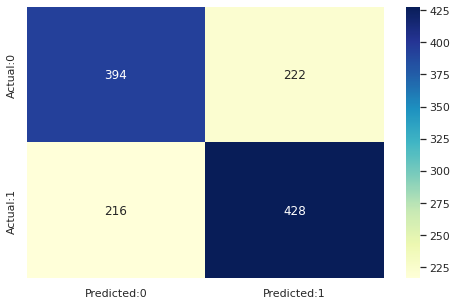

In [48]:
conf_matrix=pd.DataFrame(data=cf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")   # annot = True means we want the annotations(label values)

In [49]:
from sklearn.metrics import precision_score
precision_lr = precision_score(y_test,logistic_predict, average='binary')
print('Precision: %.3f' % precision_lr)

Precision: 0.658


In [50]:
from sklearn.metrics import recall_score
recall_lr = recall_score(y_test,logistic_predict, average='binary')
print('Recall: %.3f' % recall_lr)

Recall: 0.665


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       616
           1       0.66      0.66      0.66       644

    accuracy                           0.65      1260
   macro avg       0.65      0.65      0.65      1260
weighted avg       0.65      0.65      0.65      1260



Precision: Of all positive predictions, how many are really positive?

Recall: Of all real positive cases, how many are predicted positive?

Precision measures the extent of error caused by False Positives (FPs) whereas recall measures the extent of error caused by False Negatives (FNs)

F1-score is the harmonic mean of precision and recall.

support is the number of actual occurrences of the class in the specified dataset.

In [52]:
# The higher the precision and recall, the higher the F1-score. F1-score ranges between 0 and 1. The closer it is to 1, the better the model.
from sklearn.metrics import f1_score
logistic_f1 = f1_score(y_test,logistic_predict)
print(logistic_f1)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

0.661514683153014
The f1 score for logistic regression is 66.15%


**SUPPORT VECTOR MACHINE**

In [53]:
# train and predict
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, y_train)
svm_predict = svm.predict(X_test)

In [54]:
# accuracy
svm_accuracy = accuracy_score(y_test, svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 65.4%


Confusion Matrix

In [55]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,svm_predict)
tn, fp, fn, tp = cf_matrix.ravel()     
print(tn, fp, fn, tp)

392 224 212 432


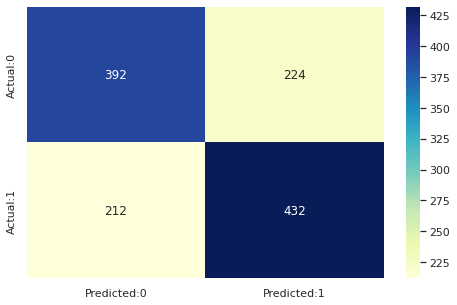

In [56]:

conf_matrix=pd.DataFrame(data=cf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       616
           1       0.66      0.67      0.66       644

    accuracy                           0.65      1260
   macro avg       0.65      0.65      0.65      1260
weighted avg       0.65      0.65      0.65      1260



In [58]:
from sklearn.metrics import precision_score
precision_svm = precision_score(y_test,svm_predict, average='binary')
print('Precision: %.3f' % precision_svm)

Precision: 0.659


In [59]:
from sklearn.metrics import recall_score
recall_svm = recall_score(y_test,svm_predict, average='binary')
print('Recall: %.3f' % recall_svm)

Recall: 0.671


In [60]:
# f1 score
from sklearn.metrics import f1_score
svm_f1 = f1_score(y_test,svm_predict)
print(svm_f1)
print(f'The f1 score for SVM algo is {round(svm_f1*100,2)}%')

0.6646153846153846
The f1 score for SVM algo is 66.46%


**DECISION TREE**

In [61]:
# train and predict
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
tree_predict = tree.predict(X_test)

In [62]:
# accuracy
tree_accuracy = accuracy_score(y_test, tree_predict)
print(f"Using decision tree we get an accuracy of {round(tree_accuracy*100,2)}%")

Using decision tree we get an accuracy of 76.11%


*Confusion Matrix*

In [63]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,tree_predict)
tn, fp, fn, tp = cf_matrix.ravel()     
print(tn, fp, fn, tp)

454 162 139 505


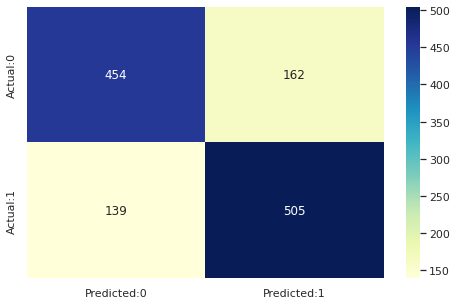

In [64]:
conf_matrix=pd.DataFrame(data=cf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [65]:
from sklearn.metrics import precision_score
precision_dt = precision_score(y_test,tree_predict, average='binary')
print('Precision: %.3f' % precision_dt)

Precision: 0.757


In [66]:
from sklearn.metrics import recall_score
recall_dt = recall_score(y_test,tree_predict, average='binary')
print('Recall: %.3f' % recall_dt)

Recall: 0.784


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       616
           1       0.76      0.78      0.77       644

    accuracy                           0.76      1260
   macro avg       0.76      0.76      0.76      1260
weighted avg       0.76      0.76      0.76      1260



In [68]:
# f1 score
from sklearn.metrics import f1_score
tree_f1 = f1_score(y_test,tree_predict)
print(tree_f1)
print(f'The f1 score for decision trees is {round(tree_f1*100,2)}%')

0.7704042715484363
The f1 score for decision trees is 77.04%


**ADAPTIVE BOOSTING (AdaBoost)**

In [69]:
# train and predict
from sklearn.ensemble import AdaBoostClassifier
model = DecisionTreeClassifier(criterion='entropy', max_depth=1)
AdaBoost = AdaBoostClassifier(base_estimator=model, n_estimators=400, learning_rate=1)
boostmodel = AdaBoost.fit(X_train,y_train)
boostmodel_predict = boostmodel.predict(X_test)

In [70]:
# accuracy
boostmodel_accuracy = accuracy_score(y_test, boostmodel_predict)
print(f"Using adaboost on decision tree we get an accuracy of {round(boostmodel_accuracy*100,2)}%")

Using adaboost on decision tree we get an accuracy of 78.25%


In [71]:
from sklearn.metrics import precision_score
precision_ada = precision_score(y_test,boostmodel_predict, average='binary')
print('Precision: %.3f' % precision_ada)

Precision: 0.783


In [72]:
from sklearn.metrics import recall_score
recall_ada = recall_score(y_test,boostmodel_predict, average='binary')
print('Recall: %.3f' % recall_ada)

Recall: 0.795


In [73]:
from sklearn.metrics import classification_report
print(classification_report(y_test,boostmodel_predict))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78       616
           1       0.78      0.80      0.79       644

    accuracy                           0.78      1260
   macro avg       0.78      0.78      0.78      1260
weighted avg       0.78      0.78      0.78      1260



In [74]:
# f1 score
from sklearn.metrics import f1_score
boostmodel_f1 = f1_score(y_test,boostmodel_predict)
print(boostmodel_f1)
print(f'The f1 score for decision trees after using the boosting algorithm is {round(boostmodel_f1*100,2)}%')

0.7889060092449921
The f1 score for decision trees after using the boosting algorithm is 78.89%


**KNN ALGORITHM**

k = 1 is an initial step of finding the accurate value of k to use in this algo

In [75]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)    # Here we are taking the k value as 1 in order to derive the actual k value
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

Choosing a K value

In [76]:
from sklearn.model_selection import cross_val_score
accuracy_rate = []    # We make a list named accuracy_rate
for i in range (1,40):     # we run a loop from 1 to 40 [this 1 to 40 is the value of k...we see the accuracy at k=1 then k=2 and so on till 40 and choose k accordingly]
  knn = KNeighborsClassifier(n_neighbors=i)
  score = cross_val_score(knn, X_train, y_train, cv=10)   # cv=10 means train and test will be in ternally happening for 10 different experiments
  accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

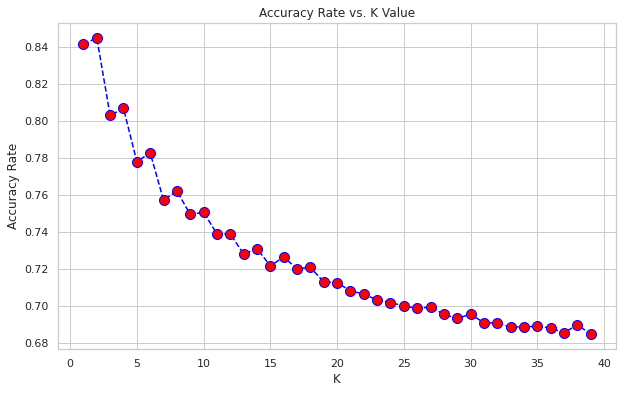

In [77]:
# We will choose a stable k from the graph
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

From the graph we see that after k=1 the accuracy rate is only decreasing...so our prediction matches as we have chosen k=1 in the beginning

In [78]:
# train and predict
# with k=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [79]:
# accuracy
knn_accuracy = accuracy_score(y_test, knn_predict)
print(f"Using knn algo we get an accuracy of {round(knn_accuracy*100,2)}%")

Using knn algo we get an accuracy of 85.0%


*Confusion Matrix*

In [80]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,knn_predict)
tn, fp, fn, tp = cf_matrix.ravel()     
print(tn, fp, fn, tp)

444 172 17 627


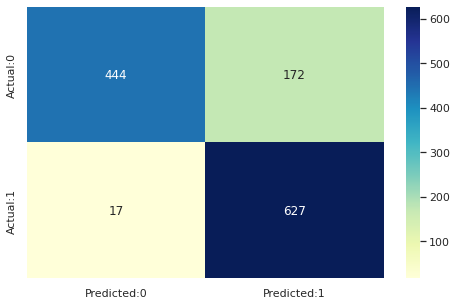

In [81]:
conf_matrix=pd.DataFrame(data=cf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [82]:
from sklearn.metrics import precision_score
precision_knn = precision_score(y_test,knn_predict, average='binary')
print('Precision: %.3f' % precision_knn)

Precision: 0.785


In [83]:
from sklearn.metrics import recall_score
recall_knn = recall_score(y_test,knn_predict, average='binary')
print('Recall: %.3f' % recall_knn)

Recall: 0.974


In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.96      0.72      0.82       616
           1       0.78      0.97      0.87       644

    accuracy                           0.85      1260
   macro avg       0.87      0.85      0.85      1260
weighted avg       0.87      0.85      0.85      1260



In [85]:
# f1 score
from sklearn.metrics import f1_score
knn_f1 = f1_score(y_test,knn_predict)
print(knn_f1)
print(f'The f1 score for KNN algo is {round(knn_f1*100,2)}%')

0.869022869022869
The f1 score for KNN algo is 86.9%


**RANDOM FOREST CLASSIFIER**

In [86]:
# train and predict
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, criterion = 'entropy', random_state=0)   # taking 50 decision trees
classifier.fit(X_train, y_train)
clf_predict = classifier.predict(X_test)

In [87]:
# accuracy
clf_accuracy = accuracy_score(y_test, clf_predict)
print(f"Using Random Forest Classifier we get an accuracy of {round(clf_accuracy*100,2)}%")

Using Random Forest Classifier we get an accuracy of 87.3%


*Confusion Matrix*

In [88]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test,clf_predict)
tn, fp, fn, tp = cf_matrix.ravel()     
print(tn, fp, fn, tp)

521 95 65 579


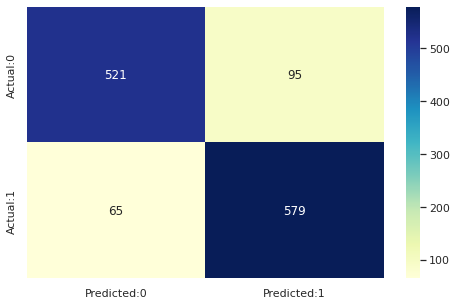

In [89]:
conf_matrix=pd.DataFrame(data=cf_matrix,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [90]:
from sklearn.metrics import precision_score
precision_rfc = precision_score(y_test,clf_predict, average='binary')
print('Precision: %.3f' % precision_rfc)

Precision: 0.859


In [91]:
from sklearn.metrics import recall_score
recall_rfc = recall_score(y_test,clf_predict, average='binary')
print('Recall: %.3f' % recall_rfc)

Recall: 0.899


In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test,clf_predict))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       616
           1       0.86      0.90      0.88       644

    accuracy                           0.87      1260
   macro avg       0.87      0.87      0.87      1260
weighted avg       0.87      0.87      0.87      1260



In [93]:
# f1 score
from sklearn.metrics import f1_score
clf_f1 = f1_score(y_test,clf_predict)
print(clf_f1)
print(f'The f1 score for Random Forest Classifier is {round(clf_f1*100,2)}%')

0.8786039453717753
The f1 score for Random Forest Classifier is 87.86%


Comaprisons between ML models

In [94]:
comparison = pd.DataFrame({
    "LR":{'Accuracy':log_accuracy, 'F1 score':logistic_f1},
    "SVM":{'Accuracy':svm_accuracy, 'F1 score':svm_f1},
    "DT":{'Accuracy':tree_accuracy, 'F1 score':tree_f1},
    "AdaBoost":{'Accuracy':boostmodel_accuracy, 'F1 score':boostmodel_f1},
    "KNN":{'Accuracy':knn_accuracy, 'F1 score':knn_f1},
    "RFC":{'Accuracy':clf_accuracy, 'F1 score':clf_f1},
}).T

comparison

,Accuracy,F1 score
LR,0.652381,0.661515
SVM,0.653968,0.664615
DT,0.761111,0.770404
AdaBoost,0.782540,0.788906
KNN,0.850000,0.869023
RFC,0.873016,0.878604


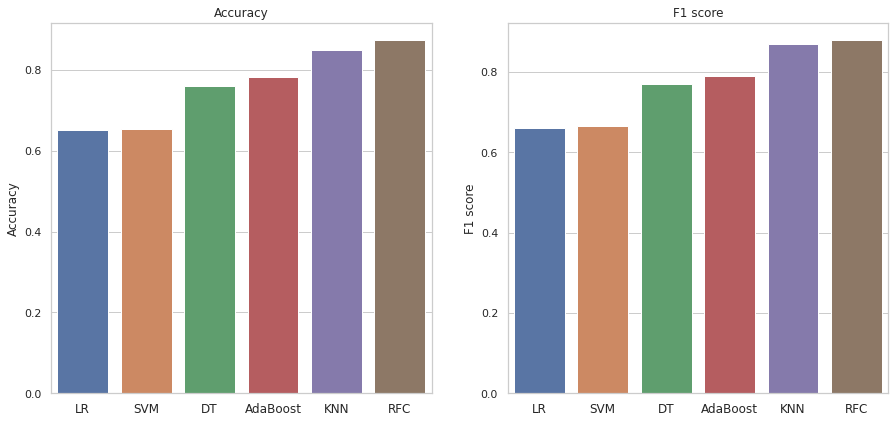

In [95]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=12)
    plt.title(titles[title])
plt.show()

In [96]:
comparison = pd.DataFrame({
    "LR":{'Precision':precision_lr, 'Recall':recall_lr},
    "SVM":{'Precision':precision_svm, 'Recall':recall_svm},
    "DT":{'Precision':precision_dt, 'Recall':recall_dt},
    "AdaBoost":{'Precision':precision_ada, 'Recall':recall_ada},
    "KNN":{'Precision':precision_knn, 'Recall':recall_knn},
    "RFC":{'Precision':precision_rfc, 'Recall':recall_rfc},
}).T

comparison

,Precision,Recall
LR,0.658462,0.664596
SVM,0.658537,0.670807
DT,0.757121,0.784161
AdaBoost,0.782875,0.795031
KNN,0.784731,0.973602
RFC,0.859050,0.899068


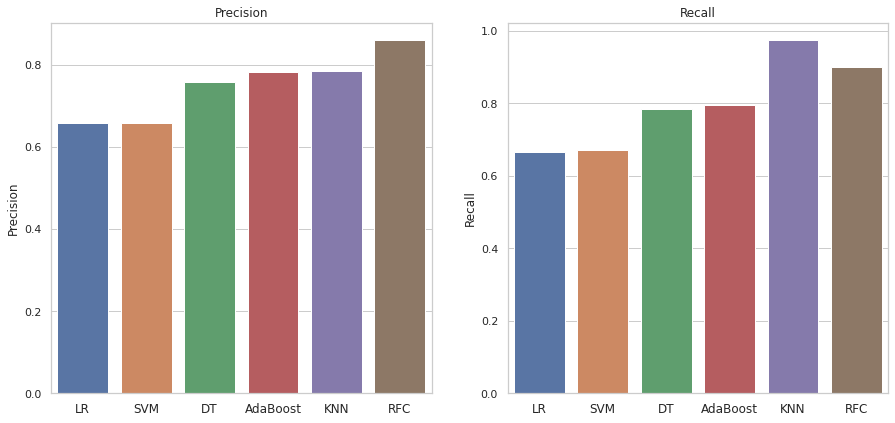

In [97]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['Precision','Recall']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=12)
    plt.title(titles[title])
plt.show()